In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#reading in the data
Data=pd.read_csv("TSLA.csv")
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#fix up the date column
Data["Date"]=pd.to_datetime(Data["Date"])
pd.set_option("display.float_format",lambda x: "%.2f" % x)
Data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,nan,nan,nan,nan,nan,nan
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan
first,2010-06-29 00:00:00,nan,nan,nan,nan,nan,nan
last,2020-02-03 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [5]:
Data.isnull().values.sum()

0

In [6]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,576.81,558.08,566.90,566.90,11788500
2412,2020-01-29,575.69,589.80,567.43,580.99,580.99,17801500
2413,2020-01-30,632.42,650.88,618.00,640.81,640.81,29005700
2414,2020-01-31,640.00,653.00,632.52,650.57,650.57,15719300


In [7]:
temp=Data.groupby(["Date"])["Close"].mean()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as mtick

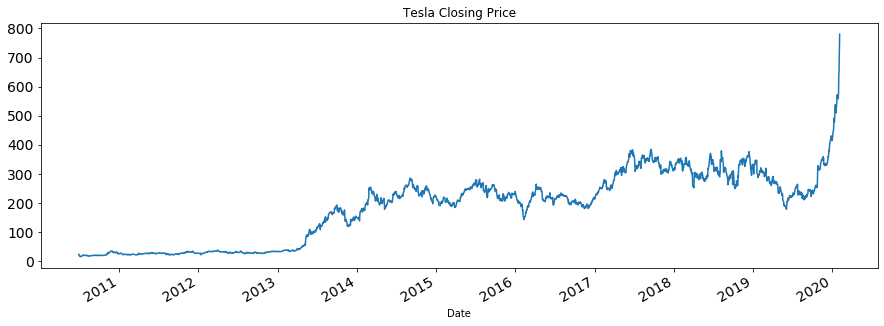

In [9]:
temp.plot(figsize=(15,5),title="Tesla Closing Price",fontsize=14)

                                   You can see there is uptrend during the time frame

In [10]:
# building time series model

In [11]:
train=Data[:2100]
test=Data[2101:]

In [12]:
# take adFuller test the statioinarity of  the timeseries
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # Super not sure how to determin this... We'll have to do some research
    # 7 to 14 days seems reasonable to find overall trends
    rolmean=pd.Series.rolling(timeseries,window=14).mean()
    rolstd=pd.Series.rolling(timeseries,window=14).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='green',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

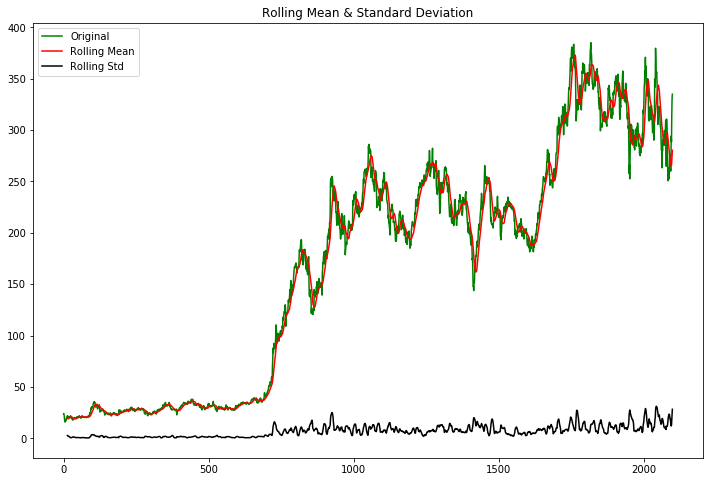

Results of Dickey-Fuller Test:
Test Statistic                  -1.06
p-value                          0.73
#Lags Used                       0.00
Number of Observations Used   2099.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [13]:
    test_stationarity(train.Close)

The statistics shows that the time series is non-stationary as TestStatistic> Critic Value. We need to remove the trend and seasonality.

# Remove Trend

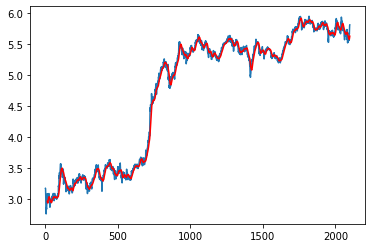

In [14]:
train_log=np.log(train["Close"])
test_log=np.log(test["Close"])
moving_avg=train_log.rolling(14).mean()
plt.plot(train_log)
plt.plot(moving_avg,color="red")
plt.show()

In [15]:
train_log_moving_avg_diff=train_log-moving_avg

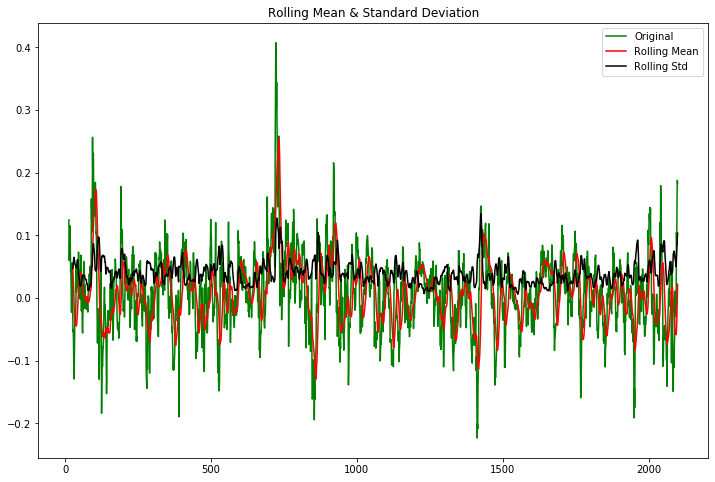

Results of Dickey-Fuller Test:
Test Statistic                  -8.47
p-value                          0.00
#Lags Used                      13.00
Number of Observations Used   2073.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [16]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

                          The trend is almost removed

In [17]:
#stabilize the mean of the time series which is also requirment.

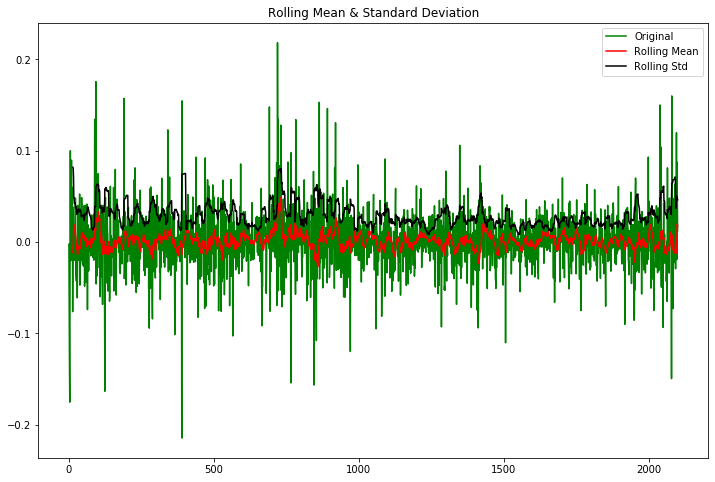

Results of Dickey-Fuller Test:
Test Statistic                 -45.55
p-value                          0.00
#Lags Used                       0.00
Number of Observations Used   2098.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [18]:
train_log_diff=train_log-train_log.shift(1)
test_stationarity(train_log_diff.dropna())

# Removing seaonality

<Figure size 432x288 with 0 Axes>

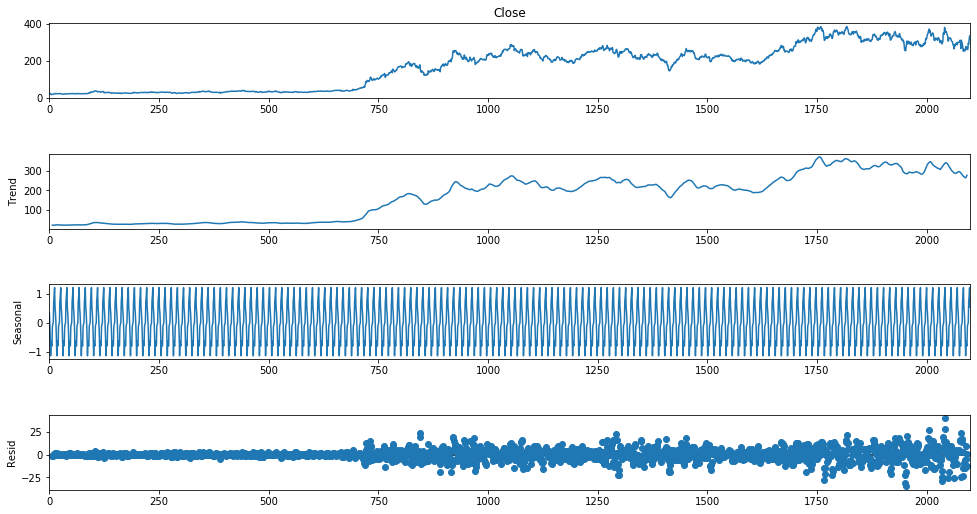

In [19]:
decomposition=seasonal_decompose(train.Close,period=14)
fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)
plt.savefig("figure1.png",bbox_inches="tight")

# Model building

In [20]:
# Auto ARIMA implement
from pmdarima import auto_arima
model=auto_arima(train_log,trace=True,error_action="ignore",suppress_warnings=True)
model.fit(train_log)

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
forecast=model.predict(n_periods=len(test))
forecast=pd.DataFrame(forecast,index=test_log.index,columns=["Prediction"])

In [ ]:
#plot the predictions for validation set
plt.plot(figsize=(15,5),train_log,label="Train")
plt.plot(figsize=(15,5),test_log,label="Test")
plt.plot(figsize=(15,5),forecast,label="Prediction")
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Actual Stock Price")
plt.legend(loc="upper left",fontsize=8)
plt.show()

In [ ]:
#judge my forecast result
from math import sqrt
from sklearn.metrics import mean_squared_error
rms=sqrt(mean_squared_error(test_log,forecast))
print("RMSE:",rms)

     A RMSE of 0 indicates a perfect fit with no errors. The smaller the RMSE score, the better the model